In [1]:
import  datetime
import pandas as pd
import pandas_datareader.data as web
from dateutil.relativedelta import relativedelta

import plotly.express as px

import numpy as np

In [2]:
end= datetime.datetime.now()

start= end- relativedelta(years=70)

gdp = web.DataReader('MKTGDPINA646NWDB', 'fred', start, end)

CPI = web.DataReader('INDCPIALLMINMEI','fred', start,end)

fedfunds = web.DataReader('INTDSRINM193N', 'fred', start,end)

M1 = web.DataReader('MABMM301INM189S', 'fred', start, end)

income = web.DataReader('RGDPNAINA666NRUG', 'fred', start, end)
unrate= web.DataReader('SLUEM1524ZSIND', 'fred', start, end)

macro = pd.concat([gdp,CPI, fedfunds,M1, income,unrate] ,axis=1)

 

In [3]:
macro.head()

,MKTGDPINA646NWDB,INDCPIALLMINMEI,INTDSRINM193N,MABMM301INM189S,RGDPNAINA666NRUG,SLUEM1524ZSIND
DATE,,,,,,
1953-01-01,NaN,NaN,NaN,NaN,348906.40625,NaN
1954-01-01,NaN,NaN,NaN,NaN,362016.65625,NaN
1955-01-01,NaN,NaN,NaN,NaN,370055.71875,NaN
1956-01-01,NaN,NaN,NaN,NaN,380155.68750,NaN
1957-01-01,NaN,NaN,NaN,NaN,380399.84375,NaN


In [4]:
macro['cpi']= np.log(macro['INDCPIALLMINMEI'])
macro['in']= np.log(macro['RGDPNAINA666NRUG'])
macro['rate']= np.log(macro['INTDSRINM193N'])
macro['M1']= np.log(macro['MABMM301INM189S'])
macro['GDP']= np.log(macro['MKTGDPINA646NWDB'])
macro['unrate']= np.log(macro['SLUEM1524ZSIND'])

In [5]:
macro= macro[['cpi','in','rate','M1','GDP','unrate']]
macro

,cpi,in,rate,M1,GDP,unrate
DATE,,,,,,
1953-01-01,NaN,12.762559,NaN,NaN,NaN,NaN
1954-01-01,NaN,12.799446,NaN,NaN,NaN,NaN
1955-01-01,NaN,12.821409,NaN,NaN,NaN,NaN
1956-01-01,NaN,12.848336,NaN,NaN,NaN,NaN
1957-01-01,NaN,12.848978,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-03-01,4.933191,NaN,1.446919,NaN,NaN,NaN
2022-04-01,4.946593,NaN,1.446919,NaN,NaN,NaN
2022-05-01,4.956721,NaN,1.536867,NaN,NaN,NaN


In [6]:
px.line(macro)

In [7]:
from statsmodels.tsa.api import VAR

In [8]:
macro['dp'] = macro['cpi'] - macro['cpi'].shift(12)
macro['dM1'] = macro['M1'] - macro['M1'].shift(12)
macro['din'] = macro['in']- macro['in'].shift(12)
macro['drate'] = macro['rate']- macro['rate'].shift(12)
macro['dGDP'] = macro['GDP']- macro['GDP'].shift(12)
macro['dunrate'] = macro['unrate']- macro['unrate'].shift(12)

In [9]:
macro

,cpi,in,rate,M1,GDP,unrate,dp,dM1,din,drate,dGDP,dunrate
DATE,,,,,,,,,,,,
1953-01-01,NaN,12.762559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954-01-01,NaN,12.799446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1955-01-01,NaN,12.821409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1956-01-01,NaN,12.848336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-01-01,NaN,12.848978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,4.933191,NaN,1.446919,NaN,NaN,NaN,0.052129,NaN,NaN,0.000000,NaN,NaN
2022-04-01,4.946593,NaN,1.446919,NaN,NaN,NaN,0.061359,NaN,NaN,0.000000,NaN,NaN
2022-05-01,4.956721,NaN,1.536867,NaN,NaN,NaN,0.067333,NaN,NaN,0.089948,NaN,NaN


In [10]:
px.scatter(x=macro['unrate'],y=macro['cpi'], trendline='ols')

In [11]:
macro= macro[['dp','din','drate','dM1','dunrate']]
macro= macro.dropna()
macro

,dp,din,drate,dM1,dunrate
DATE,,,,,
1992-01-01,0.121078,0.053374,0.182322,0.177729,0.025344
1993-01-01,0.055451,0.046414,0.000000,0.143498,0.001449
1994-01-01,0.087357,0.064466,0.000000,0.161868,0.012821
1995-01-01,0.094273,0.073013,0.000000,0.171329,0.009586
1996-01-01,0.086146,0.072781,0.000000,0.143681,0.005096
1997-01-01,0.105361,0.039700,0.000000,0.159474,-0.010836
1998-01-01,0.092709,0.060007,-0.087011,0.150830,0.014870
1999-01-01,0.089612,0.084762,-0.200671,0.188536,0.017473
2000-01-01,0.025853,0.037691,-0.117783,0.151781,-0.017168


In [12]:
px.line(macro)

In [13]:
model = VAR(macro)
print(model.select_order(3))

results = model.fit()

print(results.summary())

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 3, BIC -> 3, FPE -> 3, HQIC -> 3>
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 13, Oct, 2022
Time:                     06:29:40
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -34.5818
Nobs:                     26.0000    HQIC:                  -35.6154
Log likelihood:           313.973    FPE:                2.34017e-16
AIC:                     -36.0335    Det(Omega_mle):     8.28637e-17
--------------------------------------------------------------------
Results for equation dp
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.051918         0.042787            1.213           0.225
L1.dp              0.281605   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



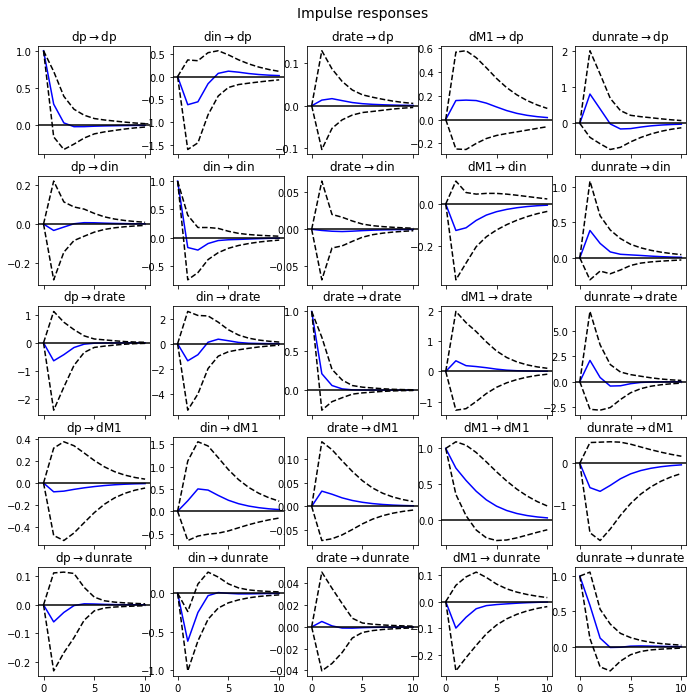

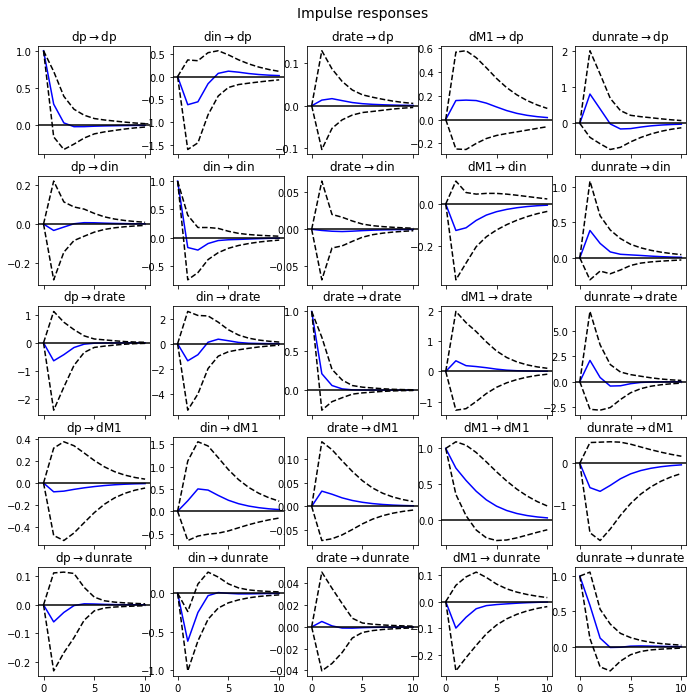

In [14]:
irf= results.irf()

irf.plot(orth= False)

In [15]:
lag_order = results.k_ar

In [16]:
lag_order

1

In [17]:
results.forecast(macro.values[-lag_order:], 10)

array([[ 0.06059839,  0.0735943 , -0.0241298 ,  0.10440527,  0.02621618],
       [ 0.06097393,  0.0721136 , -0.0256516 ,  0.10952839,  0.01965273],
       [ 0.05746422,  0.06918718, -0.03609317,  0.1166561 ,  0.01619518],
       [ 0.05648128,  0.06759524, -0.03675757,  0.12309965,  0.01545122],
       [ 0.05760676,  0.06680424, -0.03339172,  0.12788622,  0.01542866],
       [ 0.05920424,  0.06628548, -0.0307006 ,  0.13119993,  0.01538597],
       [ 0.06050551,  0.06588331, -0.02938216,  0.13346287,  0.01527528],
       [ 0.06141   ,  0.06557943, -0.02882997,  0.1350111 ,  0.01516666],
       [ 0.06201927,  0.06536391, -0.02856393,  0.13607042,  0.0150884 ],
       [ 0.06243349,  0.06521675, -0.02839698,  0.1367929 ,  0.01503732]])

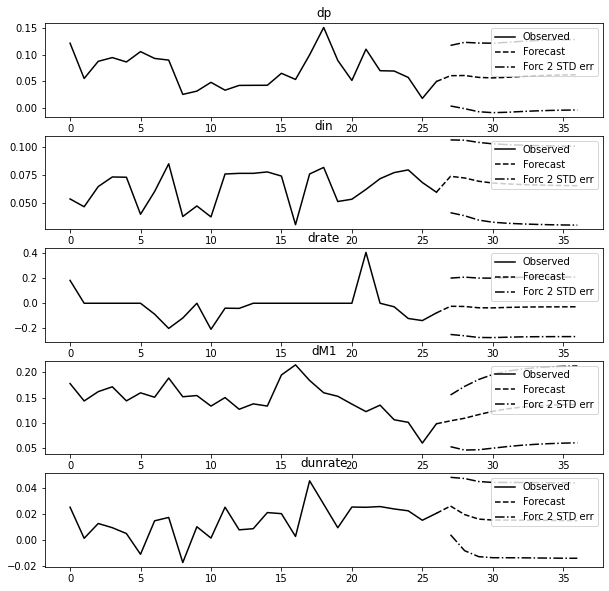

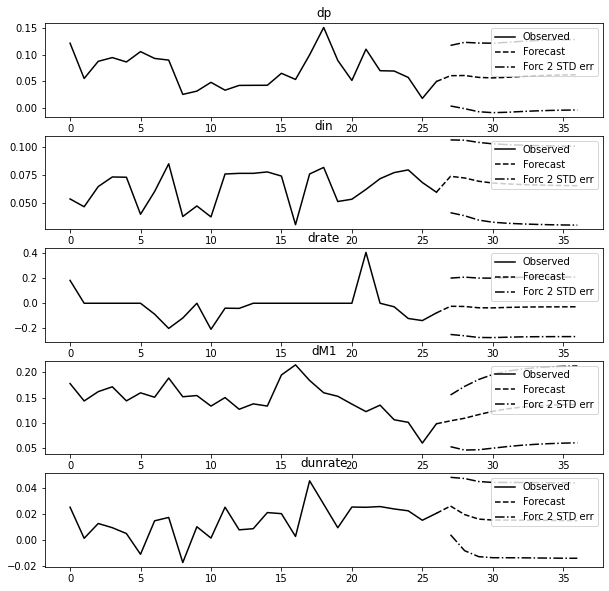

In [18]:
results.plot_forecast(10)